In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('UTY.csv')

In [3]:
df.head()

,Date,10 YR
0,1/30/2017,2.49
1,1/31/2017,2.45
2,2/1/2017,2.48
3,2/2/2017,2.48
4,2/3/2017,2.49


In [4]:
def d2d(xdate):
    parsed = [int(x) for x in xdate.split('/')]
    condate = dt.date(parsed[2], parsed[0], parsed[1])
    return condate

In [5]:
df['Date'] = df['Date'].apply(d2d)

In [6]:
df = df.set_index('Date')

In [7]:
df.plot()

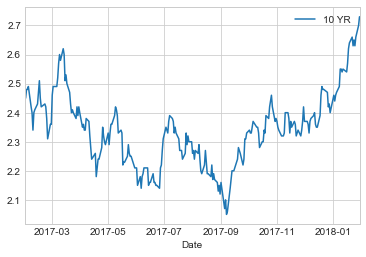

In [8]:
plt.show()

In [9]:
dfb = df.iloc[:220]

In [10]:
df = df.dropna()

In [11]:
from sklearn import linear_model

In [12]:
df.head()

,10 YR
Date,
2017-01-30,2.49
2017-01-31,2.45
2017-02-01,2.48
2017-02-02,2.48
2017-02-03,2.49


In [13]:
df[df['10 YR'] == 2.05]

,10 YR
Date,
2017-09-07,2.05


In [14]:
fb = df['10 YR'][dt.date(2017, 9, 7):]

In [15]:
type(fb)

pandas.core.series.Series

In [16]:
fb = fb.reset_index(drop=True)

In [17]:
y = np.array(fb)

In [18]:
x = np.array([i for i in range(len(y))])

In [19]:
lm = linear_model.LinearRegression()

In [20]:
A = np.vstack([x, np.ones(len(x))]).T

In [21]:
m, c = np.linalg.lstsq(A, y)[0]

In [22]:
print(m, c)

0.00383438466296 2.19878181818


In [23]:
line = m*x + c

In [24]:
pline = pd.Series(line)

In [25]:
df['fit'] = np.nan

In [26]:
df['fit'][dt.date(2017, 9, 7):] = pline

In [27]:
df.plot()

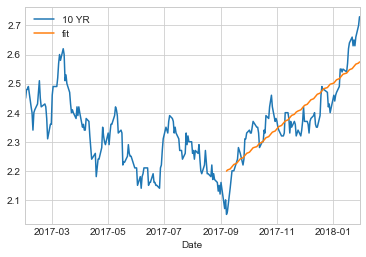

In [28]:
plt.show()

In [35]:
df['upper'] = df['fit'] + (df['fit'].std() * 1.25)

In [36]:
df.tail()

,10 YR,fit,upper,lower
Date,,,,
2018-01-24,2.65,2.559214,2.696882,2.449080
2018-01-25,2.63,2.563048,2.700716,2.452914
2018-01-26,2.66,2.566883,2.704551,2.456748
2018-01-29,2.70,2.570717,2.708385,2.460583
2018-01-30,2.73,2.574552,2.712219,2.464417


In [37]:
df['lower'] = df['fit'] - (df['fit'].std() * 1.25)

In [38]:
df.plot(figsize=(10,4))

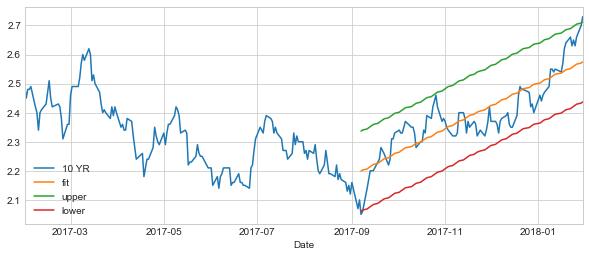

In [39]:
plt.show()

In [41]:
nt = df['10 YR'][dt.date(2017,12,29):]

In [42]:
nt = nt.reset_index(drop=True)

In [43]:
y2 = np.array(nt)

In [44]:
x2 = np.array([i for i in range(len(y2))])

In [46]:
A2 = np.vstack([x2, np.ones(len(x2))]).T

In [47]:
m2, c2 = np.linalg.lstsq(A2, y2)[0]

In [48]:
line2 = m2*x2 + c2

In [49]:
line2 = pd.Series(line2)

In [50]:
df['fit2'] = np.nan

In [51]:
df['fit2'][dt.date(2017,12,29):] = line2

In [52]:
df['up2'] = df['fit2'] + df['fit2'].std()

In [53]:
df['low2'] = df['fit2'] - df['fit2'].std()

In [64]:
df.plot(figsize=(12,6), legend=False, colormap='coolwarm')

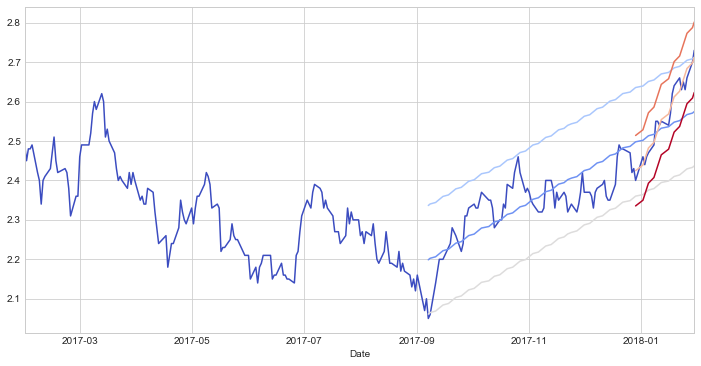

In [65]:
plt.show()